In [49]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd

In [50]:
from logisticRegression import LogisticRegression

In [51]:
df = pd.read_csv('data.csv')
df = df.sample(frac=1, random_state=np.random.randint(0,100)).reset_index(drop=True)
# display(df)

In [52]:
X = df[['area','school']].values
y = df['bought'].values

In [53]:
# print(X)
# print(y)

In [54]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_normalized = (X - X_mean) / X_std

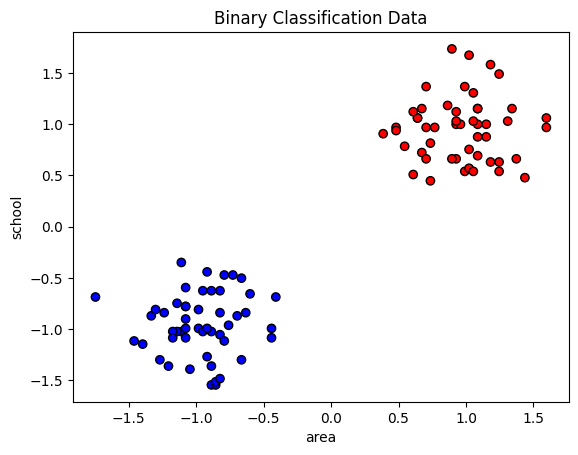

In [55]:
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.xlabel('area')
plt.ylabel('school')
plt.title('Binary Classification Data')
plt.show()

In [56]:
n = 80

X_train = X_normalized[0:n]
X_test = X_normalized[n:]

y_train = y[0:n]
y_test = y[n:]

In [57]:
lr = 0.01
n_iter = 1000
rp = 10

model = LogisticRegression(lr,n_iter,rp)
model.fit(X_train,y_train)

In [58]:
x_min, x_max = X_normalized[:, 0].min() - 1, X_normalized[:, 0].max() + 1
y_min, y_max = X_normalized[:, 1].min() - 1, X_normalized[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z_probs = np.array([model.predict(np.array([x_val, y_val])) for x_val, y_val in np.c_[xx.ravel(), yy.ravel()]])
Z = Z_probs.reshape(xx.shape)

# Swapped colors: SteelBlue for class 0, Tomato for class 1
bicolor_map = ListedColormap(['#4682B4', '#FF6347'])


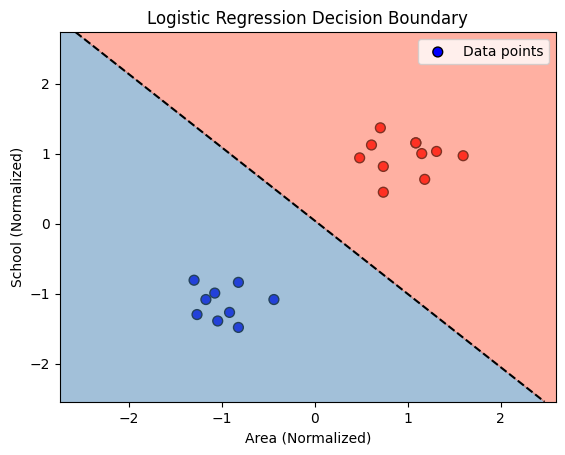

In [59]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', edgecolor='k', s=50, label='Data points')

plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap=bicolor_map, alpha=0.5)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='dashed')

plt.xlabel('Area (Normalized)')
plt.ylabel('School (Normalized)')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

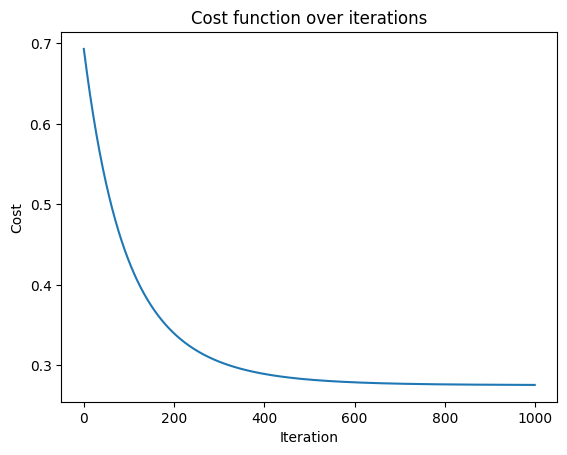

0.2757009721631771


In [60]:
plt.plot(range(len(model.costs)), model.costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost function over iterations")
plt.show()

print(model.costs[-1])